## 7.3.4.1

In [11]:
import pandas as pd
data = pd.read_csv('data.csv')

<Axes: ylabel='sepal_width'>

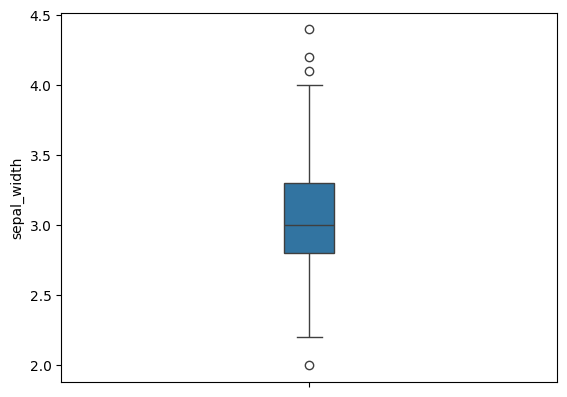

In [ ]:
import seaborn as sns
sns.boxplot(y=data['sepal_width'], width=0.1)

In [13]:
Q1 = data['sepal_width'].quantile(0.25) 
Q3 = data['sepal_width'].quantile(0.75) 

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

outliers = data[(data['sepal_width'] < lower_bound) | (data['sepal_width'] > upper_bound)] 
outliers

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


## 7.3.4.2

In [31]:
data_cleaned = data[(data['sepal_width'] >= lower_bound) & (data['sepal_width'] <= upper_bound)]

In [27]:
data['sepal_width'] = data['sepal_width'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

## 7.3.4.3

In [39]:
import pandas as pd
data = pd.read_csv('data.csv')
data['description'] = data['species'].replace({
    'setosa': 'The species Setosa is known for small petals.',
    'versicolor': 'Versicolor has medium-sized petals.',
    'virginica': 'Virginica is characterized by large petals.'
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,description
0,5.1,3.5,1.4,0.2,setosa,The species Setosa is known for small petals.
1,4.9,3.0,1.4,0.2,setosa,The species Setosa is known for small petals.
2,4.7,3.2,1.3,0.2,setosa,The species Setosa is known for small petals.
3,4.6,3.1,1.5,0.2,setosa,The species Setosa is known for small petals.
4,5.0,3.6,1.4,0.2,setosa,The species Setosa is known for small petals.


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['description'])

In [43]:
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_df.head()

,characterized,known,large,medium,petals,setosa,sized,small,species,versicolor,virginica
0,0,1,0,0,1,1,0,1,1,0,0
1,0,1,0,0,1,1,0,1,1,0,0
2,0,1,0,0,1,1,0,1,1,0,0
3,0,1,0,0,1,1,0,1,1,0,0
4,0,1,0,0,1,1,0,1,1,0,0
